In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

The function finds the total time taken for traversal, given a set of yk's, as described in the project report.

In [2]:
def findtime(ysol):

    #ysol is an array of y values where each y corresponds to each x in xarray
    #given y values for each of the x values in xarray,get time of descent for 
    #a point moving along the path formed by these y values and x values from xarray.
    timetotal=0
    for i in range(len(ysol)-1):

        #calculate time for body to go from (xarray[i],ysol[i]) to (xarray[i+1],ysol[i+1])
        #for descent on a frictionless plane in gravity, a body's velocity 
        #is determined solely by its loss in potential energy due to conservation of energy
        vel=torch.sqrt(0.65-((ysol[i]+ysol[i+1])/2))*torch.sqrt(torch.tensor(2)*torch.tensor(9.81)) 
        
        xdiff=xarray[i+1]-xarray[i]
        ydiff=ysol[i+1]-ysol[i]

        #distance covered = (deltax**2+deltay**2)**1/2
    
        dist=torch.sqrt(xdiff.pow(2)+ydiff.pow(2))
        timei=dist/vel
        #print(timei)
        #add times taken to get total time.
        timetotal=timetotal+timei
    return timetotal

Here, we try to arrive at a path, whose time of traversal is as near to 0.6 as possible. The total time of traversal obtained is 0.6266 and this can be even moved closer to 0.6 by training or making more iterations.

tensor(0.7139, grad_fn=<AddBackward0>)
tensor(0.6266, grad_fn=<AddBackward0>)


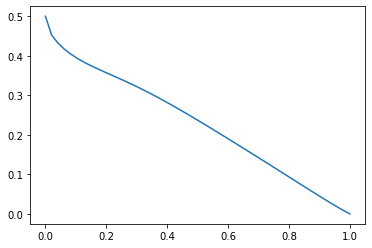

In [3]:
#import necessary python libraries

import numpy as np
import torch
import matplotlib.pyplot as plt

g=torch.tensor(9.81) #acceleration due to gravity.

#initial and final coordinates of the path
xi,yi= torch.tensor(0),torch.tensor(0.5)
xf,yf= torch.tensor(1),torch.tensor(0)

npoints=50 #resolution of the brachistochrone curve

#get npoints equally seperated points from xi to xf. and yi to yf
xarray=torch.linspace(xi,xf,npoints) 
ysol=torch.linspace(yi,yf,npoints, requires_grad=True) #starting with a straight line solution.

def findtime(ysol):

    #ysol is an array of y values where each y corresponds to each x in xarray
    #given y values for each of the x values in xarray,get time of descent for 
    #a point moving along the path formed by these y values and x values from xarray.
    timetotal=0
    for i in range(len(ysol)-1):

        #calculate time for body to go from (xarray[i],ysol[i]) to (xarray[i+1],ysol[i+1])
        #for descent on a frictionless plane in gravity, a body's velocity 
        #is determined solely by its loss in potential energy due to conservation of energy
        vel=torch.sqrt(yi-(ysol[i+1]))*torch.sqrt(torch.tensor(2)*g) 
        vel=vel+torch.sqrt(yi-(ysol[i]))*torch.sqrt(torch.tensor(2)*g) 
        vel=vel/2
        xdiff=xarray[i+1]-xarray[i]
        ydiff=ysol[i+1]-ysol[i]

        #distance covered = (deltax**2+deltay**2)**1/2
    
        dist=torch.sqrt(xdiff.pow(2)+ydiff.pow(2))
        timei=dist/vel
        #print(timei)
        #add times taken to get total time.
        timetotal=timetotal+timei
    return timetotal


#using gradient descent to arrive at a better curve, i.e. one that reduces total time

learning_rate=0.005
num_descents=2000 #number of times gradient descent is employed
for i in range(num_descents):

    totalt=findtime(ysol)
    if i ==0:
        print(totalt)
    
    #the modified total time that makes path finding for a specific time possible.
    totalt=((totalt-torch.tensor(0.6))**2)
    #find gradients of totalt wrt yarray.
    totalt.backward()

    gradients=ysol.grad
    #update ysol in array
    with torch.no_grad():
        #update all y values except initial and final states
        ysol[1:-1]=ysol[1:-1]-learning_rate*gradients[1:-1]
    ysol.grad.data.zero_()
plt.plot(xarray,ysol.detach().cpu().numpy())
print(totalt**0.5+0.6)

Here, we try to arrive at a path, whose time of traversal is as near to 0.7 as possible. The total time of traversal obtained is 0.7.The path obtained is almost a straight line throughput, except for a small curve at the beginning.

tensor(0.7139, grad_fn=<AddBackward0>)
tensor(0.7000, grad_fn=<AddBackward0>)


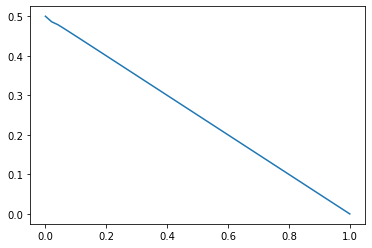

In [4]:
#import necessary python libraries

import numpy as np
import torch
import matplotlib.pyplot as plt

g=torch.tensor(9.81) #acceleration due to gravity.

#initial and final coordinates of the path
xi,yi= torch.tensor(0),torch.tensor(0.5)
xf,yf= torch.tensor(1),torch.tensor(0)

npoints=50 #resolution of the brachistochrone curve

#get npoints equally seperated points from xi to xf. and yi to yf
xarray=torch.linspace(xi,xf,npoints) 
ysol=torch.linspace(yi,yf,npoints, requires_grad=True) #starting with a straight line solution.

def findtime(ysol):

    #ysol is an array of y values where each y corresponds to each x in xarray
    #given y values for each of the x values in xarray,get time of descent for 
    #a point moving along the path formed by these y values and x values from xarray.
    timetotal=0
    for i in range(len(ysol)-1):

        #calculate time for body to go from (xarray[i],ysol[i]) to (xarray[i+1],ysol[i+1])
        #for descent on a frictionless plane in gravity, a body's velocity 
        #is determined solely by its loss in potential energy due to conservation of energy
        vel=torch.sqrt(yi-(ysol[i+1]))*torch.sqrt(torch.tensor(2)*g) 
        vel=vel+torch.sqrt(yi-(ysol[i]))*torch.sqrt(torch.tensor(2)*g) 
        vel=vel/2
        xdiff=xarray[i+1]-xarray[i]
        ydiff=ysol[i+1]-ysol[i]

        #distance covered = (deltax**2+deltay**2)**1/2
    
        dist=torch.sqrt(xdiff.pow(2)+ydiff.pow(2))
        timei=dist/vel
        #print(timei)
        #add times taken to get total time.
        timetotal=timetotal+timei
    return timetotal


#using gradient descent to arrive at a better curve, i.e. one that reduces total time

learning_rate=0.005
num_descents=2000 #number of times gradient descent is employed
for i in range(num_descents):

    totalt=findtime(ysol)
    if i ==0:
        print(totalt)
        
    totalt=((totalt-torch.tensor(0.7))**2)
    totalt.backward()

    gradients=ysol.grad
    #update ysol in array
    with torch.no_grad():
        #update all y values except initial and final states
        ysol[1:-1]=ysol[1:-1]-learning_rate*gradients[1:-1]
    ysol.grad.data.zero_()
plt.plot(xarray,ysol.detach().cpu().numpy())
print(totalt**0.5+0.7)

Here, we try to arrive at a path, whose time of traversal is as near to 0.7139 as possible, i.e exact time for a straight line path. The total time of traversal obtained is 0.7139 exactly and the path is a full straight line.

tensor(0.7139, grad_fn=<AddBackward0>)
tensor(0.7139, grad_fn=<AddBackward0>)


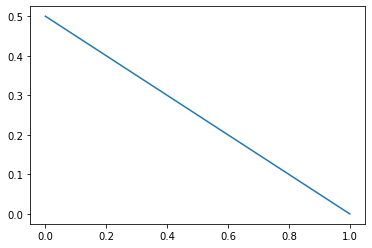

In [5]:
#import necessary python libraries

import numpy as np
import torch
import matplotlib.pyplot as plt

g=torch.tensor(9.81) #acceleration due to gravity.

#initial and final coordinates of the path
xi,yi= torch.tensor(0),torch.tensor(0.5)
xf,yf= torch.tensor(1),torch.tensor(0)

npoints=50 #resolution of the brachistochrone curve

#get npoints equally seperated points from xi to xf. and yi to yf
xarray=torch.linspace(xi,xf,npoints) 
ysol=torch.linspace(yi,yf,npoints, requires_grad=True) #starting with a straight line solution.

def findtime(ysol):

    #ysol is an array of y values where each y corresponds to each x in xarray
    #given y values for each of the x values in xarray,get time of descent for 
    #a point moving along the path formed by these y values and x values from xarray.
    timetotal=0
    for i in range(len(ysol)-1):

        #calculate time for body to go from (xarray[i],ysol[i]) to (xarray[i+1],ysol[i+1])
        #for descent on a frictionless plane in gravity, a body's velocity 
        #is determined solely by its loss in potential energy due to conservation of energy
        vel=torch.sqrt(yi-(ysol[i+1]))*torch.sqrt(torch.tensor(2)*g) 
        vel=vel+torch.sqrt(yi-(ysol[i]))*torch.sqrt(torch.tensor(2)*g) 
        vel=vel/2
        xdiff=xarray[i+1]-xarray[i]
        ydiff=ysol[i+1]-ysol[i]

        #distance covered = (deltax**2+deltay**2)**1/2
    
        dist=torch.sqrt(xdiff.pow(2)+ydiff.pow(2))
        timei=dist/vel
        #print(timei)
        #add times taken to get total time.
        timetotal=timetotal+timei
    return timetotal


#using gradient descent to arrive at a better curve, i.e. one that reduces total time

learning_rate=0.005
num_descents=2000 #number of times gradient descent is employed
for i in range(num_descents):

    totalt=findtime(ysol)
    if i ==0:
        print(totalt)
        
    totalt=((totalt-torch.tensor(0.7139))**2)
    totalt.backward()

    gradients=ysol.grad
    #update ysol in array
    with torch.no_grad():
        #update all y values except initial and final states
        ysol[1:-1]=ysol[1:-1]-learning_rate*gradients[1:-1]
    ysol.grad.data.zero_()
plt.plot(xarray,ysol.detach().cpu().numpy())
print(totalt**0.5+0.7139)

Here, we try to arrive at a path, whose time of traversal is as near to 0.55 as possible. The total time of traversal obtained is 0.5804 and this can be even moved closer to 0.55 by training or making more iterations.

tensor(0.7139, grad_fn=<AddBackward0>)
tensor(0.5804, grad_fn=<AddBackward0>)


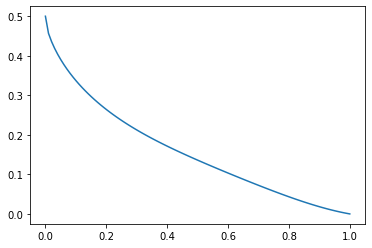

In [6]:
#import necessary python libraries

import numpy as np
import torch
import matplotlib.pyplot as plt

g=torch.tensor(9.81) #acceleration due to gravity.

#initial and final coordinates of the path
xi,yi= torch.tensor(0),torch.tensor(0.5)
xf,yf= torch.tensor(1),torch.tensor(0)

npoints=100 #resolution of the brachistochrone curve

#get npoints equally seperated points from xi to xf. and yi to yf
xarray=torch.linspace(xi,xf,npoints) 
ysol=torch.linspace(yi,yf,npoints, requires_grad=True) #starting with a straight line solution.

def findtime(ysol):

    #ysol is an array of y values where each y corresponds to each x in xarray
    #given y values for each of the x values in xarray,get time of descent for 
    #a point moving along the path formed by these y values and x values from xarray.
    timetotal=0
    for i in range(len(ysol)-1):

        #calculate time for body to go from (xarray[i],ysol[i]) to (xarray[i+1],ysol[i+1])
        #for descent on a frictionless plane in gravity, a body's velocity 
        #is determined solely by its loss in potential energy due to conservation of energy
        vel=torch.sqrt(yi-(ysol[i+1]))*torch.sqrt(torch.tensor(2)*g) 
        vel=vel+torch.sqrt(yi-(ysol[i]))*torch.sqrt(torch.tensor(2)*g) 
        vel=vel/2
        xdiff=xarray[i+1]-xarray[i]
        ydiff=ysol[i+1]-ysol[i]

        #distance covered = (deltax**2+deltay**2)**1/2
    
        dist=torch.sqrt(xdiff.pow(2)+ydiff.pow(2))
        timei=dist/vel
        #print(timei)
        #add times taken to get total time.
        timetotal=timetotal+timei
    return timetotal


#using gradient descent to arrive at a better curve, i.e. one that reduces total time

learning_rate=0.005
num_descents=40000 #number of times gradient descent is employed
for i in range(num_descents):

    totalt=findtime(ysol)
    if i ==0:
        print(totalt)
        
    totalt=((totalt-torch.tensor(0.55))**2)
    totalt.backward()

    gradients=ysol.grad
    #update ysol in array
    with torch.no_grad():
        #update all y values except initial and final states
        ysol[1:-1]=ysol[1:-1]-learning_rate*gradients[1:-1]
    ysol.grad.data.zero_()
plt.plot(xarray,ysol.detach().cpu().numpy())
print(totalt**0.5+0.55)

Here, we try to arrive at a path, whose time of traversal is as near to 0.587 as possible. The total time of traversal obtained is 0.59 and this can be even moved closer to 0.587 by training or making more iterations.

tensor(0.7139, grad_fn=<AddBackward0>)
tensor(0.5904, grad_fn=<AddBackward0>)


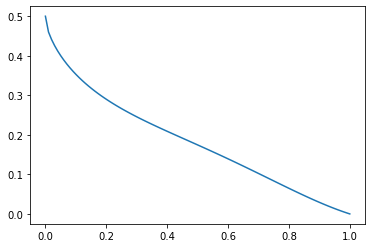

In [7]:
#import necessary python libraries

import numpy as np
import torch
import matplotlib.pyplot as plt

g=torch.tensor(9.81) #acceleration due to gravity.

#initial and final coordinates of the path
xi,yi= torch.tensor(0),torch.tensor(0.5)
xf,yf= torch.tensor(1),torch.tensor(0)

npoints=100 #resolution of the brachistochrone curve

#get npoints equally seperated points from xi to xf. and yi to yf
xarray=torch.linspace(xi,xf,npoints) 
ysol=torch.linspace(yi,yf,npoints, requires_grad=True) #starting with a straight line solution.

def findtime(ysol):

    #ysol is an array of y values where each y corresponds to each x in xarray
    #given y values for each of the x values in xarray,get time of descent for 
    #a point moving along the path formed by these y values and x values from xarray.
    timetotal=0
    for i in range(len(ysol)-1):

        #calculate time for body to go from (xarray[i],ysol[i]) to (xarray[i+1],ysol[i+1])
        #for descent on a frictionless plane in gravity, a body's velocity 
        #is determined solely by its loss in potential energy due to conservation of energy
        vel=torch.sqrt(yi-(ysol[i+1]))*torch.sqrt(torch.tensor(2)*g) 
        vel=vel+torch.sqrt(yi-(ysol[i]))*torch.sqrt(torch.tensor(2)*g) 
        vel=vel/2
        xdiff=xarray[i+1]-xarray[i]
        ydiff=ysol[i+1]-ysol[i]

        #distance covered = (deltax**2+deltay**2)**1/2
    
        dist=torch.sqrt(xdiff.pow(2)+ydiff.pow(2))
        timei=dist/vel
        #print(timei)
        #add times taken to get total time.
        timetotal=timetotal+timei
    return timetotal


#using gradient descent to arrive at a better curve, i.e. one that reduces total time

learning_rate=0.005
num_descents=80000 #number of times gradient descent is employed
for i in range(num_descents):

    totalt=findtime(ysol)
    if i ==0:
        print(totalt)
        
    totalt=((totalt-torch.tensor(0.587))**2)
    totalt.backward()

    gradients=ysol.grad
    #update ysol in array
    with torch.no_grad():
        #update all y values except initial and final states
        ysol[1:-1]=ysol[1:-1]-learning_rate*gradients[1:-1]
    ysol.grad.data.zero_()
plt.plot(xarray,ysol.detach().cpu().numpy())
print(totalt**0.5+0.587)

tensor(0.7139, grad_fn=<AddBackward0>)
tensor(0.5897, grad_fn=<AddBackward0>)


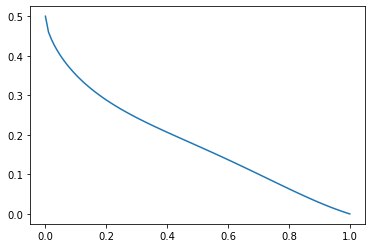

In [8]:
#import necessary python libraries

import numpy as np
import torch
import matplotlib.pyplot as plt

g=torch.tensor(9.81) #acceleration due to gravity.

#initial and final coordinates of the path
xi,yi= torch.tensor(0),torch.tensor(0.5)
xf,yf= torch.tensor(1),torch.tensor(0)

npoints=100 #resolution of the brachistochrone curve

#get npoints equally seperated points from xi to xf. and yi to yf
xarray=torch.linspace(xi,xf,npoints) 
ysol=torch.linspace(yi,yf,npoints, requires_grad=True) #starting with a straight line solution.

def findtime(ysol):

    #ysol is an array of y values where each y corresponds to each x in xarray
    #given y values for each of the x values in xarray,get time of descent for 
    #a point moving along the path formed by these y values and x values from xarray.
    timetotal=0
    for i in range(len(ysol)-1):

        #calculate time for body to go from (xarray[i],ysol[i]) to (xarray[i+1],ysol[i+1])
        #for descent on a frictionless plane in gravity, a body's velocity 
        #is determined solely by its loss in potential energy due to conservation of energy
        vel=torch.sqrt(yi-(ysol[i+1]))*torch.sqrt(torch.tensor(2)*g) 
        vel=vel+torch.sqrt(yi-(ysol[i]))*torch.sqrt(torch.tensor(2)*g) 
        vel=vel/2
        xdiff=xarray[i+1]-xarray[i]
        ydiff=ysol[i+1]-ysol[i]

        #distance covered = (deltax**2+deltay**2)**1/2
    
        dist=torch.sqrt(xdiff.pow(2)+ydiff.pow(2))
        timei=dist/vel
        #print(timei)
        #add times taken to get total time.
        timetotal=timetotal+timei
    return timetotal


#using gradient descent to arrive at a better curve, i.e. one that reduces total time

learning_rate=0.005
num_descents=60000 #number of times gradient descent is employed
for i in range(num_descents):

    totalt=findtime(ysol)
    if i ==0:
        print(totalt)
        
    totalt=((totalt-torch.tensor(0.583))**2)
    totalt.backward()

    gradients=ysol.grad
    #update ysol in array
    with torch.no_grad():
        #update all y values except initial and final states
        ysol[1:-1]=ysol[1:-1]-learning_rate*gradients[1:-1]
    ysol.grad.data.zero_()
plt.plot(xarray,ysol.detach().cpu().numpy())
print(totalt**0.5+0.583)

Here, we try to arrive at a path, whose time of traversal is as near to 1.1 as possible. The total time of traversal obtained is 1.17 and this can be even moved closer to 1.1 by training or making more iterations.

tensor(0.7139, grad_fn=<AddBackward0>)
tensor(1.1707, grad_fn=<PowBackward0>)


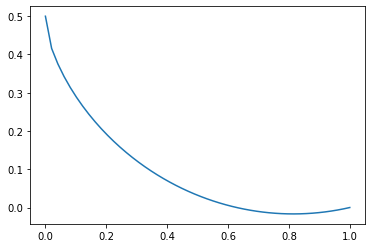

In [11]:
#import necessary python libraries

import numpy as np
import torch
import matplotlib.pyplot as plt

g=torch.tensor(9.81) #acceleration due to gravity.

#initial and final coordinates of the path
xi,yi= torch.tensor(0),torch.tensor(0.5)
xf,yf= torch.tensor(1),torch.tensor(0)

npoints=50 #resolution of the brachistochrone curve

#get npoints equally seperated points from xi to xf. and yi to yf
xarray=torch.linspace(xi,xf,npoints) 
ysol=torch.linspace(yi,yf,npoints, requires_grad=True) #starting with a straight line solution.

def findtime(ysol):

    #ysol is an array of y values where each y corresponds to each x in xarray
    #given y values for each of the x values in xarray,get time of descent for 
    #a point moving along the path formed by these y values and x values from xarray.
    timetotal=0
    for i in range(len(ysol)-1):

        #calculate time for body to go from (xarray[i],ysol[i]) to (xarray[i+1],ysol[i+1])
        #for descent on a frictionless plane in gravity, a body's velocity 
        #is determined solely by its loss in potential energy due to conservation of energy
        vel=torch.sqrt(yi-(ysol[i+1]))*torch.sqrt(torch.tensor(2)*g) 
        vel=vel+torch.sqrt(yi-(ysol[i]))*torch.sqrt(torch.tensor(2)*g) 
        vel=vel/2
        xdiff=xarray[i+1]-xarray[i]
        ydiff=ysol[i+1]-ysol[i]

        #distance covered = (deltax**2+deltay**2)**1/2
    
        dist=torch.sqrt(xdiff.pow(2)+ydiff.pow(2))
        timei=dist/vel
        #print(timei)
        #add times taken to get total time.
        timetotal=timetotal+timei
    return timetotal


#using gradient descent to arrive at a better curve, i.e. one that reduces total time

learning_rate=0.005
num_descents=6000 #number of times gradient descent is employed
for i in range(num_descents):

    totalt=findtime(ysol)
    if i ==0:
        print(totalt)
        
    totalt=((totalt+torch.tensor(0.6))**2)
    totalt.backward()

    gradients=ysol.grad
    #update ysol in array
    with torch.no_grad():
        #update all y values except initial and final states
        ysol[1:-1]=ysol[1:-1]-learning_rate*gradients[1:-1]
    ysol.grad.data.zero_()
plt.plot(xarray,ysol.detach().cpu().numpy())
print(totalt**0.5)

Here, we try to arrive at a path, whose time of traversal is as near to 2*least possible time as possible.

tensor(0.7139, grad_fn=<AddBackward0>)
tensor(1.0684, grad_fn=<PowBackward0>)


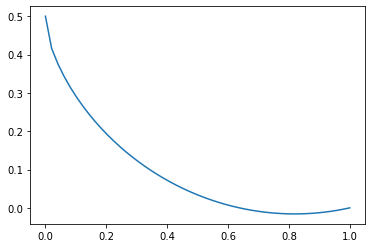

In [13]:
#import necessary python libraries

import numpy as np
import torch
import matplotlib.pyplot as plt

g=torch.tensor(9.81) #acceleration due to gravity.

#initial and final coordinates of the path
xi,yi= torch.tensor(0),torch.tensor(0.5)
xf,yf= torch.tensor(1),torch.tensor(0)

npoints=50 #resolution of the brachistochrone curve

#get npoints equally seperated points from xi to xf. and yi to yf
xarray=torch.linspace(xi,xf,npoints) 
ysol=torch.linspace(yi,yf,npoints, requires_grad=True) #starting with a straight line solution.

def findtime(ysol):

    #ysol is an array of y values where each y corresponds to each x in xarray
    #given y values for each of the x values in xarray,get time of descent for 
    #a point moving along the path formed by these y values and x values from xarray.
    timetotal=0
    for i in range(len(ysol)-1):

        #calculate time for body to go from (xarray[i],ysol[i]) to (xarray[i+1],ysol[i+1])
        #for descent on a frictionless plane in gravity, a body's velocity 
        #is determined solely by its loss in potential energy due to conservation of energy
        vel=torch.sqrt(yi-(ysol[i+1]))*torch.sqrt(torch.tensor(2)*g) 
        vel=vel+torch.sqrt(yi-(ysol[i]))*torch.sqrt(torch.tensor(2)*g) 
        vel=vel/2
        xdiff=xarray[i+1]-xarray[i]
        ydiff=ysol[i+1]-ysol[i]

        #distance covered = (deltax**2+deltay**2)**1/2
    
        dist=torch.sqrt(xdiff.pow(2)+ydiff.pow(2))
        timei=dist/vel
        #print(timei)
        #add times taken to get total time.
        timetotal=timetotal+timei
    return timetotal


#using gradient descent to arrive at a better curve, i.e. one that reduces total time

learning_rate=0.005
num_descents=6000 #number of times gradient descent is employed
for i in range(num_descents):

    totalt=findtime(ysol)
    if i ==0:
        print(totalt)
        
    totalt=((totalt*2))
    totalt.backward()

    gradients=ysol.grad
    #update ysol in array
    with torch.no_grad():
        #update all y values except initial and final states
        ysol[1:-1]=ysol[1:-1]-learning_rate*gradients[1:-1]
    ysol.grad.data.zero_()
plt.plot(xarray,ysol.detach().cpu().numpy())
print(totalt**0.5)